In [94]:
from numpy.linalg.linalg import sqrt
def mds(squared_distances, k):
    """Rank k multidimensional scaling
    
    @param squared_distances: numpy ndarray of shape (n,n) of squared distances
    @param k: the rank of the approximation
    @return Y: numpy ndarray of shape (n,k) of points
    """
    n = squared_distances.shape[0]
    Y = np.empty((n, k))

    # find Px
    one = np.ones((n, 1))
    id = np.identity(n)
    P = id - 1/n * (one@one.T)

    # find M
    M = -1 * 1/2 * P@squared_distances@P.T

    # svd
    u,sig,vt = np.linalg.svd(M, full_matrices=False)
    sig_root = np.zeros(sig.shape)
    i = 0
    for item in sig:
      sig_root[i] = sqrt(item)
      i+=1

    print(np.diag(sig_root[:k]))
    
    # construct B
    Y = u[:, :k] @ np.diag(sig_root[:k])
    # print(Y.shape)
    # print(Y)
    
    return Y

Run MD

In [ ]:
!curl -o allpairs_buildings.csv https://www.cs.columbia.edu/~djhsu/coms3251-f22/data/allpairs_buildings.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19721  100 19721    0     0  20671      0 --:--:-- --:--:-- --:--:-- 20650


In [ ]:
# loads the pairwise distances from the CSV file
import csv
import numpy as np
with open('allpairs_buildings.csv') as f:
    reader = csv.reader(f)
    squared_distances = np.array([[float(x) ** 2 for x in row] for row in reader])

In [ ]:
import matplotlib.pyplot as plt
Y = mds(squared_distances, 2)
plt.plot(Y[:,0], Y[:,1], 'b.')
for i in range(Y.shape[0]):
    plt.text(Y[i,0], Y[i,1], str(i), color='red', fontsize=12)
plt.show()

[[4.0396516  0.        ]
 [0.         2.87516714]]


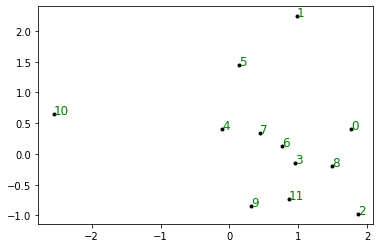

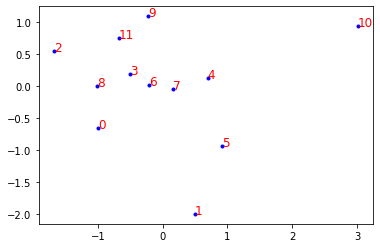

In [95]:
import scipy.spatial
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.random.randn(12,2) # 12 points in R^2
D = scipy.spatial.distance_matrix(X, X, 2) ** 2 # matrix of pairwise squared distances
Y = mds(D,2)

plt.plot(X[:,0], X[:,1], 'k.')
for i in range(Y.shape[0]):
    plt.text(X[i,0], X[i,1], str(i), color='green', fontsize=12)
plt.show()

plt.plot(Y[:,0], Y[:,1], 'b.')
for i in range(Y.shape[0]):
    plt.text(Y[i,0], Y[i,1], str(i), color='red', fontsize=12)
plt.show()